Allison Forte

DSC 540

Project: Milestone 2

July 2, 2022

# Cleaning and formatting the flat file
Perform at least 5 data transformation and/or cleansing steps to your flat file data. 
Label each transformation (Step #1, Step #2, etc.) in your code and describe what it is doing in 1-2 sentences. 

In [272]:
import numpy as np
import pandas as pd

file = pd.read_csv('/Users/allison.forte/Documents/540 Assignments/tech_fundings.csv')

df = pd.DataFrame(data=file)
original_size = df.shape
print('\nThe shape of this dataset is ', df.shape)
df.head()


The shape of this dataset is  (3575, 8)


,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


# Step 1: Change headers (Region to HQ Country, Vertical to Category)

In [274]:
df.rename(columns = {'Region':'Company_HQ', 'Vertical':'Category', 'Funding Amount (USD)':'Funding_amt', 
                     'Funding Date':'Funding_date'}, inplace = True)

df.head()

,index,Company,Website,Company_HQ,Category,Funding_amt,Funding Stage,Funding_date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


# Step 2: Check for and remove missing and incorrect data
Remove missing data in essential columns

In [275]:
# Check for missing data

df.isnull().sum()

index             0
Company           0
Website           0
Company_HQ       12
Category          0
Funding_amt       0
Funding Stage     0
Funding_date      0
dtype: int64

12 companny HQ are missing. For this analysis, we will remove the data with missing values

In [276]:
# Remove missing values

df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [277]:
# Confirm missing data has been removed

df.isnull().sum()

index            0
Company          0
Website          0
Company_HQ       0
Category         0
Funding_amt      0
Funding Stage    0
Funding_date     0
dtype: int64

In [278]:
# Remove 'Unknown' values from funding amount

df['Funding_amt'] = df['Funding_amt'].replace(['Unknown'],'0')

# Step 3: Check for and remove duplicates
Remove duplicated data based on company website (Website should be a unique identifier for each company)

In [279]:
# Check for duplicates

website_dup = any(df.Website.duplicated())

print('There are website duplicates: {}'.format(website_dup))

There are website duplicates: True


In [280]:
# Remove the duplicates

df = df.drop_duplicates(subset='Website', keep='first', inplace=False)

In [281]:
# Confirm duplicates have been removed

website_dup = any(df.Website.duplicated())

print('There are website duplicates: {}'.format(website_dup))

There are website duplicates: False


# Step 4: Divide Funding_date into 2 columns

In [283]:
df[['Funding_month', 'Funding_year']] = df['Funding_date'].str.split('-', expand=True)

df.head()

,index,Company,Website,Company_HQ,Category,Funding_amt,Funding Stage,Funding_date,Funding_month,Funding_year
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20,Jan,20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20,Jan,20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20,Jan,20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20,Jan,20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20,Jan,20


# Step 5: Translate month abbreviation to number

In [284]:
def monthToNum(shortMonth):
    return {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'Jun': 6,
            'Jul': 7,
            'Aug': 8,
            'Sep': 9, 
            'Oct': 10,
            'Nov': 11,
            'Dec': 12}[shortMonth]
months = (df['Funding_month'])

month_num  = []

for m in months:
    month_num.append(monthToNum(m))

df['month_num'] = month_num
df.head()

,index,Company,Website,Company_HQ,Category,Funding_amt,Funding Stage,Funding_date,Funding_month,Funding_year,month_num
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20,Jan,20,1
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20,Jan,20,1
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20,Jan,20,1
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20,Jan,20,1
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20,Jan,20,1


# Step 6: Change the data types in the columns to make them easier to work with

In [285]:
# Step 2: Change the data types in the columns to make them easier to work with

print('The starting data types are listed below:')
print(df.dtypes)

df['Funding_amt'] = df['Funding_amt'].astype(float)  # change funding amount into a float
df['Funding_year'] = df['Funding_year'].astype(float)

print('The final data types are listed below:')
print(df.dtypes)

The starting data types are listed below:
index             int64
Company          object
Website          object
Company_HQ       object
Category         object
Funding_amt      object
Funding Stage    object
Funding_date     object
Funding_month    object
Funding_year     object
month_num         int64
dtype: object
The final data types are listed below:
index              int64
Company           object
Website           object
Company_HQ        object
Category          object
Funding_amt      float64
Funding Stage     object
Funding_date      object
Funding_month     object
Funding_year     float64
month_num          int64
dtype: object


# Step 7: Identify outliers and bad data

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9ef2d3520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9ef2d3c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9ef2d3190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9ef2bb3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9ef2bb730>],
 'means': []}

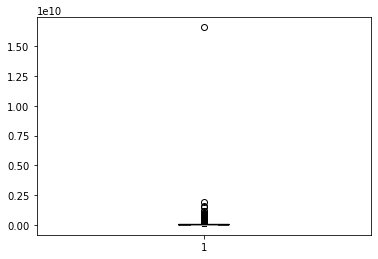

In [286]:
# Search for outliers

import matplotlib.pyplot as plt

plt.boxplot(df.Funding_amt, notch=True)

Remove outliers above 70,000,000 and at 0

In [287]:
# Remove outliers

df = df[(df['Funding_amt'] <70000000) & (df['Funding_amt'] > 0)] 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9ef311670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9ef311d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9ef3112e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9ef31a4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9ef31a880>],
 'means': []}

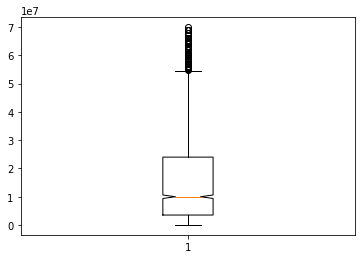

In [288]:
plt.boxplot(df.Funding_amt, notch=True)

# Final data

In [290]:
final_size = df.shape
print('\nThe shape of this dataset is ', df.shape)
print('\n', df.head())
print('\n', df.tail())
print('\n',original_size[0]-final_size[0], 'rows have been removed due to duplicates, missing data, and outliers')


The shape of this dataset is  (2704, 11)

    index    Company                   Website      Company_HQ  \
0      1   Internxt     https://internxt.com/           Spain   
1      2   Dockflow      https://dockflow.com         Belgium   
2      3  api.video         https://api.video          France   
3      4    Buck.ai          https://buck.ai/   United States   
4      5  Prodsight  https://www.prodsight.ai  United Kingdom   

                  Category  Funding_amt Funding Stage Funding_date  \
0               Blockchain     278940.0          Seed       Jan-20   
1                Logistics     292244.0          Seed       Jan-20   
2           Developer APIs     300000.0          Seed       Jan-20   
3  Artificial Intelligence     300000.0          Seed       Jan-20   
4  Artificial Intelligence     529013.0          Seed       Jan-20   

  Funding_month  Funding_year  month_num  
0           Jan          20.0          1  
1           Jan          20.0          1  
2           Jan